In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime

In [2]:
df = pd.read_csv('traffic_data.csv')  # replace with your filename
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df.head()

,Timestamp,Vehicle_Count,Hour
0,2025-01-06 00:00:00,146,0
1,2025-01-06 01:00:00,57,1
2,2025-01-06 02:00:00,59,2
3,2025-01-06 03:00:00,99,3
4,2025-01-06 04:00:00,63,4


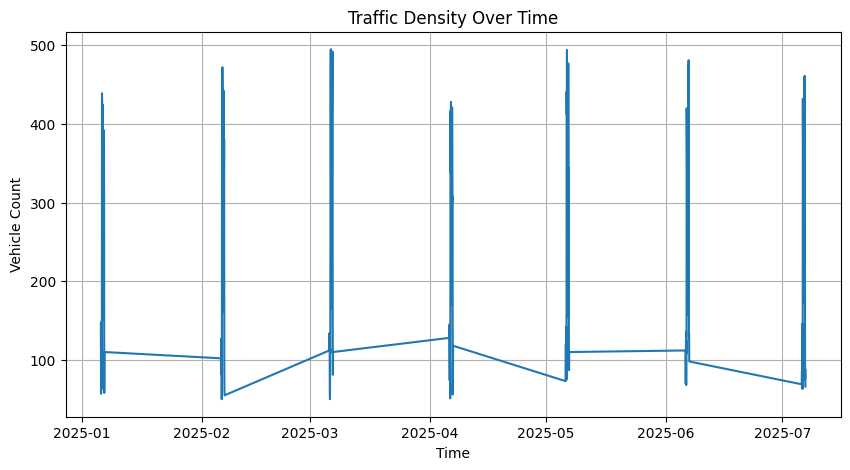

In [3]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Timestamp', y='Vehicle_Count', data=df)
plt.title("Traffic Density Over Time")
plt.xlabel("Time")
plt.ylabel("Vehicle Count")
plt.grid(True)
plt.show()

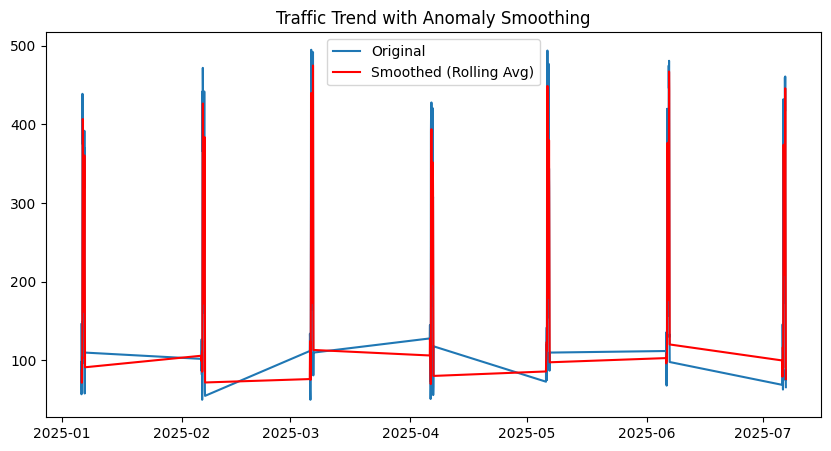

In [4]:
df['Rolling_Avg'] = df['Vehicle_Count'].rolling(window=3).mean()

plt.figure(figsize=(10, 5))
plt.plot(df['Timestamp'], df['Vehicle_Count'], label='Original')
plt.plot(df['Timestamp'], df['Rolling_Avg'], label='Smoothed (Rolling Avg)', color='red')
plt.legend()
plt.title("Traffic Trend with Anomaly Smoothing")
plt.show()

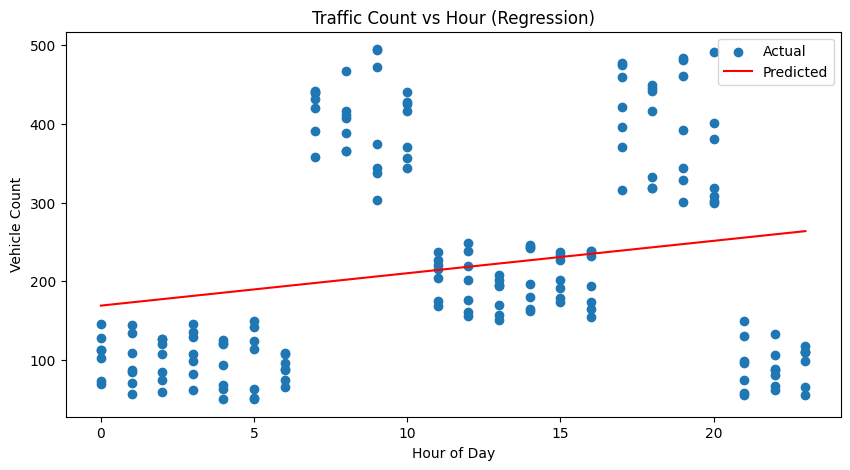

In [5]:
X = df[['Hour']]
y = df['Vehicle_Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

df['Predicted_Count'] = model.predict(X)


plt.figure(figsize=(10, 5))
plt.scatter(X, y, label='Actual')
plt.plot(X, df['Predicted_Count'], color='red', label='Predicted')
plt.title("Traffic Count vs Hour (Regression)")
plt.xlabel("Hour of Day")
plt.ylabel("Vehicle Count")
plt.legend()
plt.show()